<a href="https://colab.research.google.com/github/IhebBenOthman/ARABIC-MNIST-/blob/main/arabic_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Python packages to manipulate files
import os
import pathlib
from pathlib import Path
import datetime
# Tensorflow and Numpy packages
import tensorflow as tf
import numpy as np
# Display related packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import PIL
import PIL.Image
import shutil
%matplotlib inline

In [2]:
my_devices = tf.config.experimental.list_physical_devices(device_type='CPU')
tf.config.experimental.set_visible_devices(devices= my_devices, device_type='CPU')
tf.config.set_visible_devices([], 'GPU')

In [3]:
! git clone https://github.com/minus--/arabic-letters-tutorial


Cloning into 'arabic-letters-tutorial'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 50 (delta 25), reused 31 (delta 12), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [4]:
! tar xvzf arabic-letters-tutorial/arabic_handwritten_data.tgz # unzip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
data/train_data/id_8608_label_12.png
data/train_data/id_2106_label_12.png
data/train_data/id_10590_label_8.png
data/train_data/id_2818_label_17.png
data/train_data/id_7349_label_23.png
data/train_data/id_5289_label_18.png
data/train_data/id_3050_label_18.png
data/train_data/id_11114_label_18.png
data/train_data/id_192_label_24.png
data/train_data/id_6258_label_27.png
data/train_data/id_6579_label_11.png
data/train_data/id_9058_label_13.png
data/train_data/id_10945_label_25.png
data/train_data/id_8889_label_20.png
data/train_data/id_4557_label_10.png
data/train_data/id_5785_label_24.png
data/train_data/id_5074_label_19.png
data/train_data/id_7812_label_25.png
data/train_data/id_12978_label_27.png
data/train_data/id_325_label_13.png
data/train_data/id_9146_label_24.png
data/train_data/id_5488_label_14.png
data/train_data/id_7108_label_21.png
data/train_data/id_9379_label_25.png
data/train_data/id_3045_label_17.

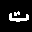

In [15]:
Image(filename = "data/test_data/id_1014_label_3.png", width = 32, height = 32)

In [51]:
directory = "./data/train_data/"
images = os.listdir(directory)

In [66]:
#shutil.rmtree("data/data2/train_data")
#shutil.rmtree("data/data2/test_data")

In [52]:
#ls data/train_data/

In [53]:
mkdir data/data2

mkdir: cannot create directory ‘data/data2’: File exists


In [70]:
mkdir data/data2/test_data

In [71]:
mkdir data/data2/train_data

In [73]:
for i in range(1,29):
  os.mkdir("data/data2/test_data/{}".format(i))
  os.mkdir("data/data2/train_data/{}".format(i))

In [74]:
directory_train = "./data/train_data/"
images_train = os.listdir(directory_train)
directory_test = "./data/test_data/"
images_test = os.listdir(directory_test)

In [76]:
for image in images_train:
  if image.endswith('.png'):
    label =int(tf.strings.regex_replace(input=image,pattern=r".+_label_(\d+)\.png",rewrite =r"\1").numpy())
    original = directory_train+image
    target =("./data/data2/train_data/{}/".format(label))+image
    shutil.copy2(original,target)


In [79]:
from keras_preprocessing.image import ImageDataGenerator
TRAINING_DIR = "data/data2/train_data/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [80]:
VALIDATION_DIR = "data/data2/test_data/"
validation_datagen = ImageDataGenerator(rescale = 1./255)


In [81]:
train_generator = training_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size=(32,32),
  class_mode='categorical',
  batch_size=32
)

Found 13440 images belonging to 28 classes.


In [82]:
validation_generator = validation_datagen.flow_from_directory(
  VALIDATION_DIR,
  target_size=(32,32),
  class_mode='categorical',
  batch_size=32
)

Found 3360 images belonging to 28 classes.


In [83]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

In [86]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, steps_per_epoch=100, validation_data = validation_generator, verbose = 1, validation_steps=105)

model.save("rps.h5")

Epoch 1/50
100/100 [==============================] - 19s 187ms/step - loss: 2.5617 - accuracy: 0.2119 - val_loss: 2.0740 - val_accuracy: 0.3092
Epoch 2/50
100/100 [==============================] - 18s 181ms/step - loss: 2.3295 - accuracy: 0.2606 - val_loss: 1.7890 - val_accuracy: 0.4390
Epoch 3/50
100/100 [==============================] - 18s 183ms/step - loss: 2.1949 - accuracy: 0.3109 - val_loss: 1.5096 - val_accuracy: 0.4765
Epoch 4/50
100/100 [==============================] - 18s 181ms/step - loss: 2.0257 - accuracy: 0.3688 - val_loss: 1.8155 - val_accuracy: 0.4104
Epoch 5/50
100/100 [==============================] - 18s 182ms/step - loss: 1.9196 - accuracy: 0.3853 - val_loss: 1.2631 - val_accuracy: 0.5943
Epoch 6/50
100/100 [==============================] - 18s 181ms/step - loss: 1.8053 - accuracy: 0.4300 - val_loss: 1.3498 - val_accuracy: 0.5518
Epoch 7/50
100/100 [==============================] - 18s 180ms/step - loss: 1.6510 - accuracy: 0.4700 - val_loss: 1.2339 - val_ac

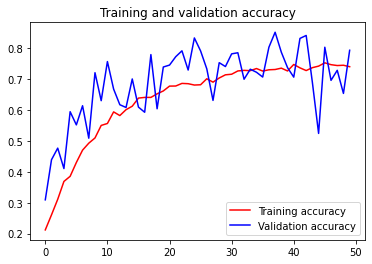

<Figure size 432x288 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [94]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving th.PNG to th.PNG
th.PNG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [ ]:
#j'ai trouvé que L'ANN est plus mieux que CNN en basant sur l'accuracy el la fonction de cout dans ce cas j'ai la courbe de l'entrainement oscillé par rapport a la courbe de la validation
# d'où en doit passer par la moyenne de la courbe ou de refaire le choix des layrers